# E-Commerce Product Performance Dashboard & Analysis

---

## 🔖 Objective
- Analyzed a synthetic e-commerce dataset focusing on price, ratings, returns, and delivery 
trends.
- The goal is to understand sales patterns, top products, and customer preferences through simple analysis and visualizations.
- Cleaned and preprocessed data, handled missing values (~5%), and performed exploratory data analysis 
using Python.
- Created interactive dashboards in Power BI/Tableau to visualize product performance and category-wise 
insights. 
- Delivered key business insights to optimize pricing, reduce return rates, and improve stock and delivery 
planning.

## 💡 Dataset
- I’m using a dataset from Kaggle.
- **Source**: [E-Commerce Product Performance Dataset](https://www.kaggle.com/datasets/efeyldz/e-commerce-product-performance-dataset)
### Data Fields:
-  Product_Price: The listed price of the product in USD (range: 5 to 1000).
-  Discount_Rate: Discount rate applied to the product (0.0 to 0.8).
-  Product_Rating: Customer rating on a scale from 1 to 5.
-  Number_of_Reviews: Total number of user reviews (0 to 5000, highly skewed).
-  Stock_Availability: Product availability in stock (1 = available, 0 = out of stock).
-  Days_to_Deliver: Number of days it takes to deliver the product (1 to 30).
-  Return_Rate: Proportion of items returned after purchase (0.0 to 0.9).
-  Category_ID: ID of the product category (integer from 1 to 10).

## 📈 Tools & Technologies
- Python: For coding
- Pandas: To work with data tables
- NumPy
- Matplotlib & Seaborn: For creating plots
- Plotly: For interactive charts

## 💡 Key Questions
- Which products generate the most profit?
- Is there a correlation between views, cart adds, and purchases?
- Which products have the highest conversion rates?
- What categories perform best in terms of revenue and profit?

## 📊 Data Exploration & Cleaning

### Import importmant Libraries

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load & inspect the DataSet

In [2]:
#read the dataset
df = pd.read_csv(".\ecommerce_product_data.csv")

In [3]:
#Show the first 5 rows of the dataset
print("First 5 rows of the data:")
df.head()

First 5 rows of the data:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,NaN,7.0
4,126.584663,0.411845,3.553082,671.0,1.0,14.0,0.672163,6.0


In [4]:
#Show the shape of the dataset
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(2000, 8)

In [5]:
#Show basic information about the dataset
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       1900 non-null   float64
 1   Discount_Rate       1900 non-null   float64
 2   Product_Rating      1900 non-null   float64
 3   Number_of_Reviews   1900 non-null   float64
 4   Stock_Availability  1900 non-null   float64
 5   Days_to_Deliver     1900 non-null   float64
 6   Return_Rate         1900 non-null   float64
 7   Category_ID         1900 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


In [6]:
#Show summary statistics of the dataset
print("Summary statistics of the dataset:")
df.describe()

Summary statistics of the dataset:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,156.774274,0.286993,3.729987,304.318421,0.903158,15.411579,0.328904,5.572105
std,93.484558,0.159012,0.885164,310.344539,0.295821,8.534049,0.176306,2.827601
min,5.000000,0.005368,1.000000,0.000000,0.000000,1.000000,0.006528,1.000000
25%,87.414867,0.165603,3.125828,86.750000,1.000000,8.000000,0.190178,3.000000
50%,153.663352,0.265994,3.770215,210.000000,1.000000,15.000000,0.307430,6.000000
75%,217.788796,0.391186,4.417711,429.000000,1.000000,22.000000,0.444752,8.000000
max,535.273149,0.800000,5.000000,2848.000000,1.000000,30.000000,0.900000,10.000000


### Handling missing values
The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column

#### Checking missing values

In [7]:
#check null values
print("Null values in the dataset:")
df.isnull()

Null values in the dataset:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,True,False
1996,True,False,False,False,True,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


In [8]:
#number of missing values in each column
print("Number of missing values in each column:")
df.isnull().sum()

Number of missing values in each column:


Product_Price         100
Discount_Rate         100
Product_Rating        100
Number_of_Reviews     100
Stock_Availability    100
Days_to_Deliver       100
Return_Rate           100
Category_ID           100
dtype: int64

In [9]:
#number of rows having all missing Values
print("Number of rows having all missing values:",df.isnull().all(axis=1).sum())

Number of rows having all missing values: 0


In [10]:
#number of Columns having all missing Values
print("Number of Columns having all missing values:",df.isnull().all(axis=0).sum())

Number of Columns having all missing values: 0


In [11]:
#count missing values in each rows
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       1
4       0
       ..
1995    1
1996    2
1997    0
1998    0
1999    0
Length: 2000, dtype: int64

In [12]:
#count the number of rows having > 3 missing values
print("Number of rows having more than 3 missing values:",df.isnull().sum(axis=1).gt(3).sum())
#count the number of rows having 3 missing values
print("Number of rows having 3 missing values:",df.isnull().sum(axis=1).eq(3).sum())
#count the number of rows having 2 missing values
print("Number of rows having 2 missing values:",df.isnull().sum(axis=1).eq(2).sum())
#count the number of rows having 1 missing values
print("Number of rows having 1 missing values:",df.isnull().sum(axis=1).eq(1).sum())
#count the number of rows having 0 missing values
print("Number of rows having NO missing values:",df.isnull().sum(axis=1).eq(0).sum())

Number of rows having more than 3 missing values: 0
Number of rows having 3 missing values: 10
Number of rows having 2 missing values: 94
Number of rows having 1 missing values: 582
Number of rows having NO missing values: 1314


In [13]:
#count missing values in each column
df.isnull().sum(axis=0)

Product_Price         100
Discount_Rate         100
Product_Rating        100
Number_of_Reviews     100
Stock_Availability    100
Days_to_Deliver       100
Return_Rate           100
Category_ID           100
dtype: int64

#### Missing Value Treatment

In [14]:
#missing percetage
print("Missing percentage in each column:")
df.isnull().sum()/len(df.index)*100

Missing percentage in each column:


Product_Price         5.0
Discount_Rate         5.0
Product_Rating        5.0
Number_of_Reviews     5.0
Stock_Availability    5.0
Days_to_Deliver       5.0
Return_Rate           5.0
Category_ID           5.0
dtype: float64

No any column is having more than 30% missing values
So, we should to impute the missing values rather than droping the missing values.

##### Imputing Missing Values
- Using mean and median and mode
    - Mean	For numerical data that’s normally distributed (not skewed).
    - Median	For skewed numerical data or when there are outliers.
    - Mode	For categorical or binary data.

In [15]:
#impute Product_Price with median, because Prices are often skewed (e.g., many lower-priced items and fewer high-priced ones).
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
#impute Discount_Rate with median, because Discounts are often normally distributed.
df['Discount_Rate'].fillna(df['Discount_Rate'].median(), inplace=True)
#impute Product_Rating with median, because Ratings may be skewed (e.g., more 4s and 5s due to positive bias in reviews).
df['Product_Rating'].fillna(df['Product_Rating'].median(), inplace=True)
#impute Number_of_Reviews with median, because It's a count and the distribution is likely highly right-skewed (few products have many reviews). 
df['Number_of_Reviews'].fillna(df['Number_of_Reviews'].median(), inplace=True)
#impute Stock_Availability with mode, because It's a categorical variable and mode is the most common value.
df['Stock_Availability'].fillna(df['Stock_Availability'].mode()[0], inplace=True)
#impute Days_to_Deliver with median, because Integer field, usually centered but might have some skew. Since it's a small-range number.
df['Days_to_Deliver'].fillna(df['Days_to_Deliver'].median(), inplace=True)
#impute Return_Rate with median, as most products may have low return rates, with few having high rates.
df['Return_Rate'].fillna(df['Return_Rate'].median(), inplace=True)

In [16]:
#check null values
print("Null values in the dataset after imputation:")
df.isnull().sum()

Null values in the dataset after imputation:


Product_Price           0
Discount_Rate           0
Product_Rating          0
Number_of_Reviews       0
Stock_Availability      0
Days_to_Deliver         0
Return_Rate             0
Category_ID           100
dtype: int64

- Using Product Characteristics for Imputation of Category_ID.
If Product_Price, Discount_Rate, or Product_Rating correlate strongly with Category_ID, use these to predict missing values. Example: Use group-based imputation, filling missing values based on similar Product_Rating.

In [17]:
#imputing Category_ID based on similar product ratings
df['Category_ID'].fillna(df.groupby('Product_Rating')['Category_ID'].transform('median'), inplace=True)

In [18]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


Product_Price          0
Discount_Rate          0
Product_Rating         0
Number_of_Reviews      0
Stock_Availability     0
Days_to_Deliver        0
Return_Rate            0
Category_ID           88
dtype: int64

In [19]:
#imputing Category_ID based on similar Return_Rate
df['Category_ID'].fillna(df.groupby('Return_Rate')['Category_ID'].transform('median'), inplace=True)

In [20]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


Product_Price          0
Discount_Rate          0
Product_Rating         0
Number_of_Reviews      0
Stock_Availability     0
Days_to_Deliver        0
Return_Rate            0
Category_ID           85
dtype: int64

In [21]:
#imputing Category_ID based on similar Stock_Availability
df['Category_ID'].fillna(df.groupby('Stock_Availability')['Category_ID'].transform('median'), inplace=True)

In [22]:
#recheck null values after imputation of Category_ID
print("Null values in the dataset after imputation of Category_ID:")
df.isnull().sum()

Null values in the dataset after imputation of Category_ID:


Product_Price         0
Discount_Rate         0
Product_Rating        0
Number_of_Reviews     0
Stock_Availability    0
Days_to_Deliver       0
Return_Rate           0
Category_ID           0
dtype: int64

Now all missing values has handled.

### Data Types 
Verify that each column has the appropriate data type.

In [23]:
#Check the datatypes of all the columns of the dataframe
print("Datatypes of all the columns:")
df.dtypes

Datatypes of all the columns:


Product_Price         float64
Discount_Rate         float64
Product_Rating        float64
Number_of_Reviews     float64
Stock_Availability    float64
Days_to_Deliver       float64
Return_Rate           float64
Category_ID           float64
dtype: object

- **Number_of_Reviews** should be int64 as the description states values range from 0 to 5000 and are integers (total number of reviews). This should be int64 to reflect whole numbers.
- **Stock_Availability** should be bool as the description specifies this as binary (1 = available, 0 = out of stock)
- **Days_to_Deliver** should be int64 as Delivery days (1 to 30) are whole numbers.
-  **Category_ID** should be int64 as the description states this is an integer from 1 to 10

In [24]:
# Convert columns to appropriate data types
df['Number_of_Reviews'] = df['Number_of_Reviews'].astype('int64')
df['Stock_Availability'] = df['Stock_Availability'].astype(bool)
df['Days_to_Deliver'] = df['Days_to_Deliver'].astype('int64')
df['Category_ID'] = df['Category_ID'].astype('int64')

# Verify data types
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
Product_Price         float64
Discount_Rate         float64
Product_Rating        float64
Number_of_Reviews       int64
Stock_Availability       bool
Days_to_Deliver         int64
Return_Rate           float64
Category_ID             int64
dtype: object


Now data types of all the columns are as expected.

### Check Outliers 
If any column has data range out of it's range as described. 

In [25]:
#check summary statistics of the dataset after conversion
print("Summary statistics of the dataset after conversion:")
df.describe()

Summary statistics of the dataset after conversion:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Days_to_Deliver,Return_Rate,Category_ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,156.618728,0.285943,3.731999,299.602500,15.391000,0.327831,5.592000
std,91.118801,0.155051,0.862784,303.180485,8.318336,0.171903,2.758141
min,5.000000,0.005368,1.000000,0.000000,1.000000,0.006528,1.000000
25%,90.822298,0.170780,3.170359,92.000000,8.750000,0.197575,3.000000
50%,153.663352,0.265994,3.770215,210.000000,15.000000,0.307430,6.000000
75%,213.818644,0.384355,4.379557,414.250000,22.000000,0.434611,8.000000
max,535.273149,0.800000,5.000000,2848.000000,30.000000,0.900000,10.000000


**Boxplots for numerical columns**

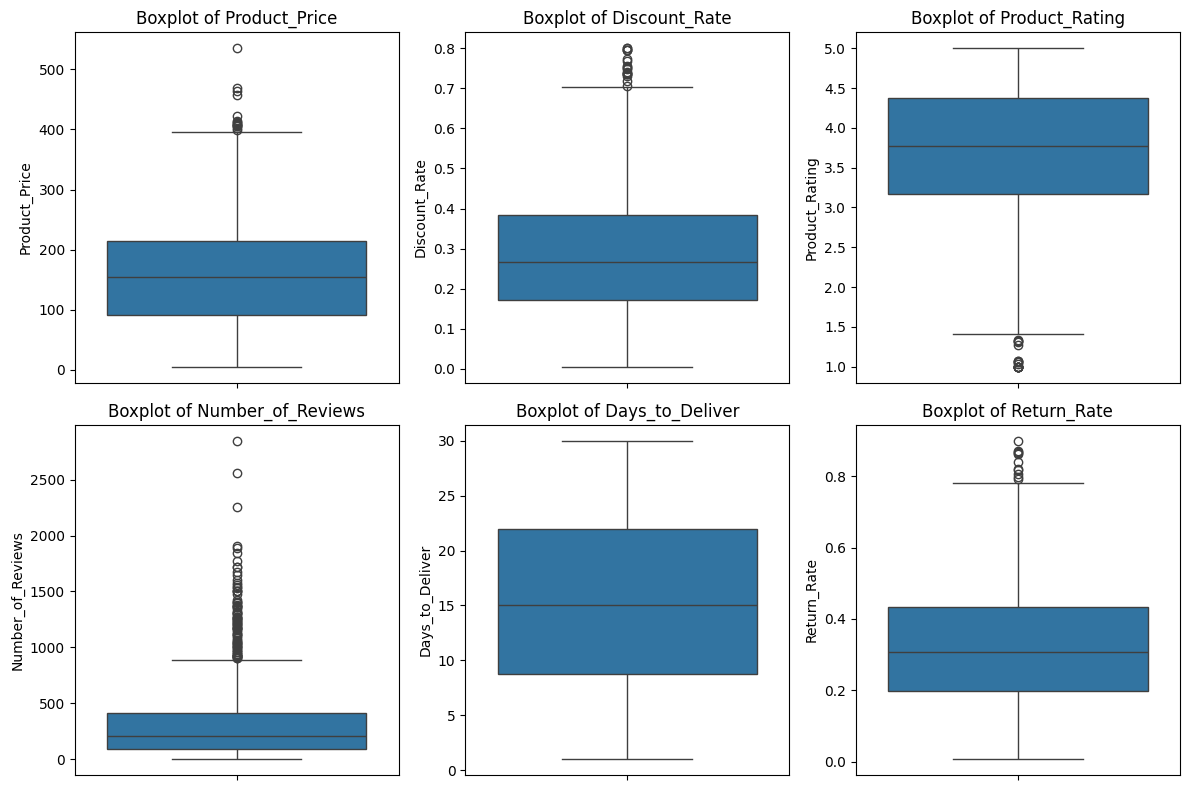

In [26]:
# Generate boxplots for numerical columns
numerical_cols = ['Product_Price', 'Discount_Rate', 'Product_Rating', 'Number_of_Reviews', 
                 'Days_to_Deliver', 'Return_Rate']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Boxplot Analysis**
- ***Product_Price:***
    - Boxplot: The box (IQR) spans roughly 90 to 214 (from your summary: 25th percentile = 90.82, 75th percentile = 213.82). Whiskers extend to ~5 (min) and ~350 (based on 1.5 * IQR). There are a few outliers around 400–500.
    - Expected Range: 5 to 1000 USD.
    - Observation: The max is 535.27 (from summary), and outliers are between 400–500. These are within the expected range (≤1000), so they’re not problematic. They just indicate some higher-priced products, which is reasonable in an e-commerce dataset.
    - Conclusion: No action needed.

- ***Discount_Rate:***
    - Boxplot: The box spans ~0.17 to 0.38 (25th to 75th percentile). Whiskers extend to ~0.0 and 0.65. There are several outliers near 0.7–0.8.
    - Expected Range: 0.0 to 0.8.
    - Observation: The max is 0.8, and outliers are close to 0.8. Since 0.8 is within the expected range, these outliers are valid. The clustering near 0.8 suggests some products have the maximum discount, which is plausible.
    - Conclusion: No action needed.

- ***Product_Rating:***
    - Boxplot: The box spans ~3.17 to 4.38. Whiskers extend to ~2.0 and 5.0. Outliers are near 1.0–1.5.
    - Expected Range: 1 to 5.
    - Observation: The min is 1.0, max is 5.0. Outliers are low ratings (1.0–1.5), which are within the expected range. These likely represent poorly rated products.
    - Conclusion: No action needed.

- ***Number_of_Reviews:***
    - Boxplot: The box spans ~92 to 414. Whiskers extend to ~0 and ~1000. Many outliers are between 1000–2500, with a few near 2500.
    - Expected Range: 0 to 5000.
    - Observation: The max is 2848, and outliers are up to ~2500. The dataset description notes this column is “highly skewed,” so a long tail with high values is expected. All values are within the range (≤5000), so these outliers are valid.
    - Conclusion: No action needed, as the skewness is intentional per the dataset description.

- ***Days_to_Deliver:***
    - Boxplot: The box spans ~8.75 to 22. Whiskers extend to 1 and 30. No outliers.
    - Expected Range: 1 to 30.
    - Observation: The min is 1, max is 30. No outliers are present, and all values are within the expected range.
    - Conclusion: No action needed.

- ***Return_Rate:***
    - Boxplot: The box spans ~0.20 to 0.43. Whiskers extend to ~0.0 and 0.7. Outliers are near 0.8–0.9.
    - Expected Range: 0.0 to 0.9.
    - Observation: The max is 0.9, and outliers are near 0.9. These are within the expected range, indicating some products have a high return rate, which is plausible.
    - Conclusion: No action needed.

**Why a Boxplot Wasn’t Created for Stock_Availability**
- ***Reason:*** Stock_Availability is a binary column (0 = out of stock, 1 = available), as per the dataset description. Boxplots are typically used for continuous or discrete numerical data with a range of values (e.g., Product_Price, Number_of_Reviews) to visualize distribution, quartiles, and outliers. For binary data like Stock_Availability, a boxplot isn’t meaningful because:
    - A boxplot would show a "box" with just two values (0 and 1), which doesn’t provide useful insights about distribution.
    - There are no outliers to detect in binary data (values are strictly 0 or 1, assuming the data is clean).
    - The median, quartiles, and whiskers (calculated by a boxplot) don’t add value for a column with only two possible values.
- ***Better Visualization:*** For binary or categorical data like Stock_Availability, a count plot or bar plot is more appropriate to show the frequency of each value (e.g., how many products are in stock vs. out of stock).



In [27]:
# Check unique values for Stock_Availability
print("Stock_Availability value counts:")
print(df['Stock_Availability'].value_counts(dropna=False))

Stock_Availability value counts:
Stock_Availability
True     1816
False     184
Name: count, dtype: int64


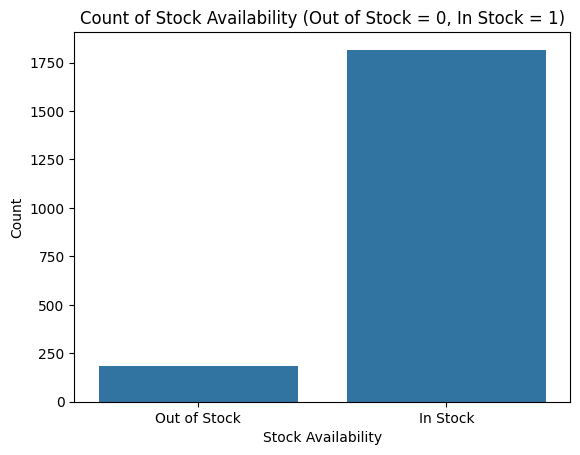

In [28]:
# Create a count plot for Stock_Availability
sns.countplot(x=df['Stock_Availability'])
plt.title('Count of Stock Availability (Out of Stock = 0, In Stock = 1)')
plt.xlabel('Stock Availability')
plt.ylabel('Count')
# Customize x-axis labels
plt.xticks(ticks=[0, 1], labels=['Out of Stock', 'In Stock'])
plt.show()

All are within the expected ranges specified in the dataset description.

### Check for duplicates

In [29]:
#Check for duplicates
print("Number of duplicate rows in the dataset:",df.duplicated().sum())

Number of duplicate rows in the dataset: 0


Now the data cleaning proces has done and we are ready to Exploratory Data Analysis (EDA)

###  Exploratory Data Analysis (EDA)

EDA involves analyzing the dataset to uncover patterns, trends, and insights, often through summary statistics and visualizations. This will help us understand the data better and generate meaningful insights.

In [30]:
# Recompute summary statistics
print("Summary statistics of the cleaned dataset:")
df.describe()

Summary statistics of the cleaned dataset:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Days_to_Deliver,Return_Rate,Category_ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,156.618728,0.285943,3.731999,299.602500,15.391000,0.327831,5.592000
std,91.118801,0.155051,0.862784,303.180485,8.318336,0.171903,2.758141
min,5.000000,0.005368,1.000000,0.000000,1.000000,0.006528,1.000000
25%,90.822298,0.170780,3.170359,92.000000,8.750000,0.197575,3.000000
50%,153.663352,0.265994,3.770215,210.000000,15.000000,0.307430,6.000000
75%,213.818644,0.384355,4.379557,414.250000,22.000000,0.434611,8.000000
max,535.273149,0.800000,5.000000,2848.000000,30.000000,0.900000,10.000000


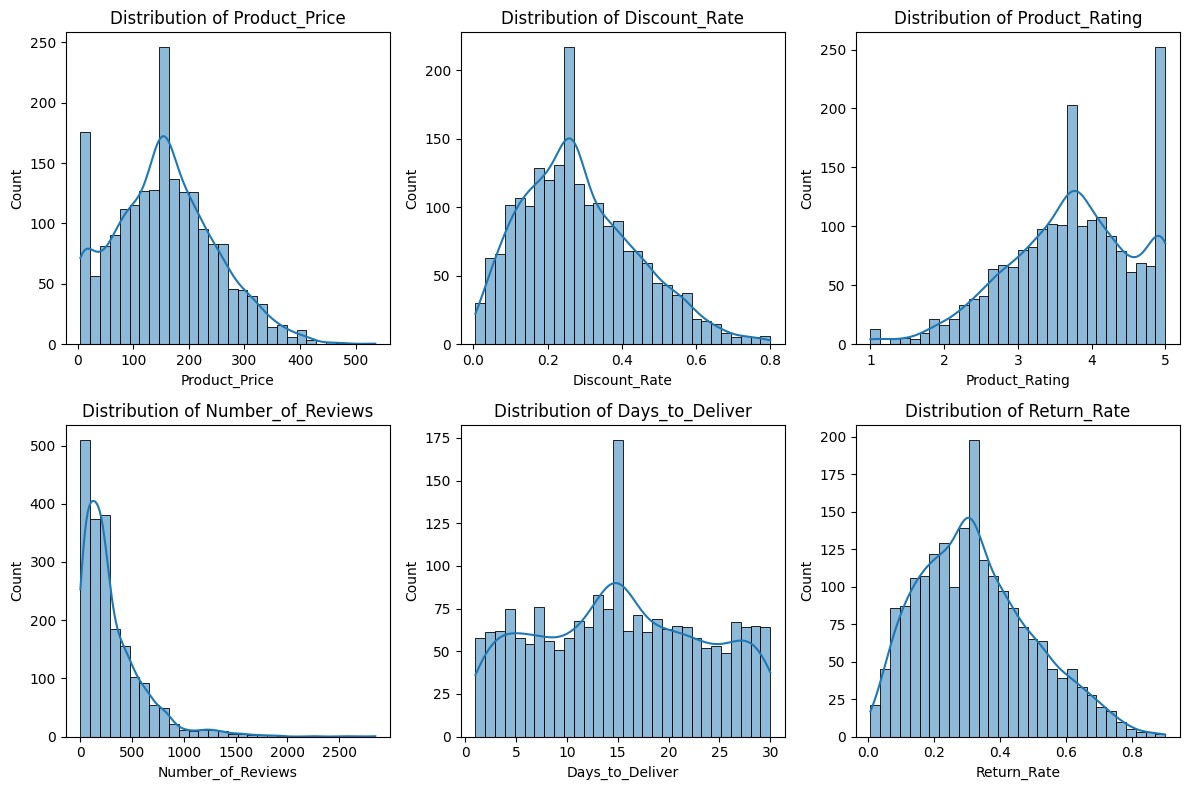

In [31]:
# Create histograms for numerical columns
numerical_cols = ['Product_Price', 'Discount_Rate', 'Product_Rating', 'Number_of_Reviews', 
                 'Days_to_Deliver', 'Return_Rate']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

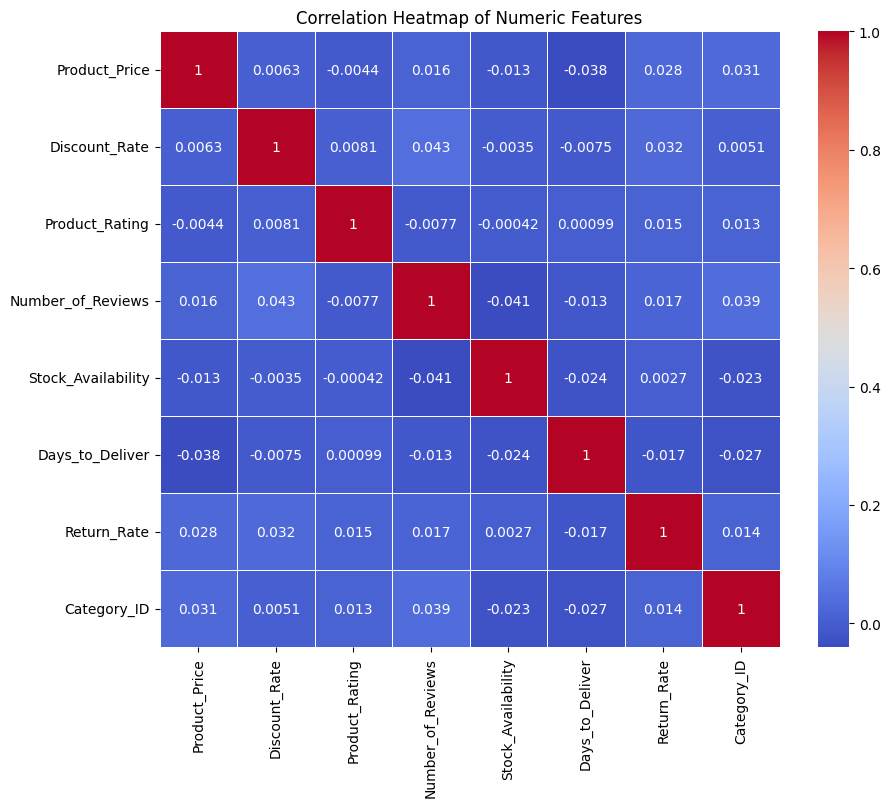

In [32]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [33]:
#correlation matrix
print("Correlation matrix:")
df.corr()

Correlation matrix:


,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
Product_Price,1.000000,0.006335,-0.004400,0.015874,-0.012570,-0.037565,0.027624,0.030554
Discount_Rate,0.006335,1.000000,0.008094,0.042580,-0.003518,-0.007541,0.032319,0.005117
Product_Rating,-0.004400,0.008094,1.000000,-0.007664,-0.000420,0.000985,0.014693,0.012756
Number_of_Reviews,0.015874,0.042580,-0.007664,1.000000,-0.040672,-0.013021,0.017124,0.038692
Stock_Availability,-0.012570,-0.003518,-0.000420,-0.040672,1.000000,-0.024142,0.002742,-0.022631
Days_to_Deliver,-0.037565,-0.007541,0.000985,-0.013021,-0.024142,1.000000,-0.016935,-0.027145
Return_Rate,0.027624,0.032319,0.014693,0.017124,0.002742,-0.016935,1.000000,0.013572
Category_ID,0.030554,0.005117,0.012756,0.038692,-0.022631,-0.027145,0.013572,1.000000


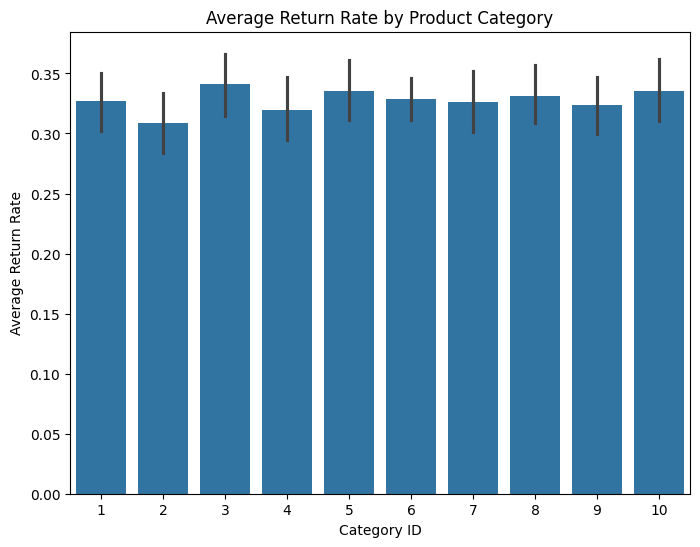

In [34]:
#Bar Plot - Return Rate by Category
plt.figure(figsize=(8, 6))
sns.barplot(x='Category_ID', y='Return_Rate', data=df, estimator='mean')
plt.title("Average Return Rate by Product Category")
plt.xlabel("Category ID")
plt.ylabel("Average Return Rate")
plt.show()

In [35]:
# Compute average Return_Rate by Category_ID
print("Average Return Rate by Category ID:")
print(df.groupby('Category_ID')['Return_Rate'].mean())

Average Return Rate by Category ID:
Category_ID
1     0.326686
2     0.309078
3     0.341080
4     0.319751
5     0.335317
6     0.328761
7     0.326158
8     0.331537
9     0.323540
10    0.335668
Name: Return_Rate, dtype: float64


Average Product Rating by Stock Availability:
Stock_Availability
False    3.733137
True     3.731883
Name: Product_Rating, dtype: float64


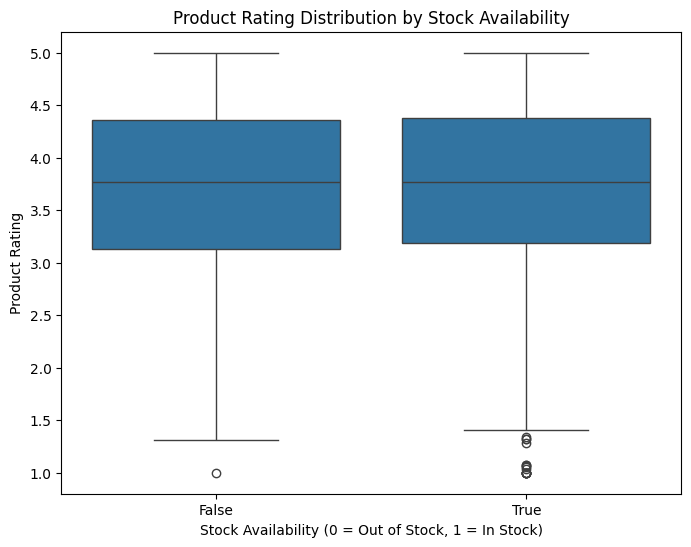

In [36]:
# Compute average Product_Rating by Stock_Availability
print("Average Product Rating by Stock Availability:")
print(df.groupby('Stock_Availability')['Product_Rating'].mean())

# Boxplot for Stock_Availability vs Product_Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stock_Availability', y='Product_Rating', data=df)
plt.title('Product Rating Distribution by Stock Availability')
plt.xlabel('Stock Availability (0 = Out of Stock, 1 = In Stock)')
plt.ylabel('Product Rating')
plt.show()

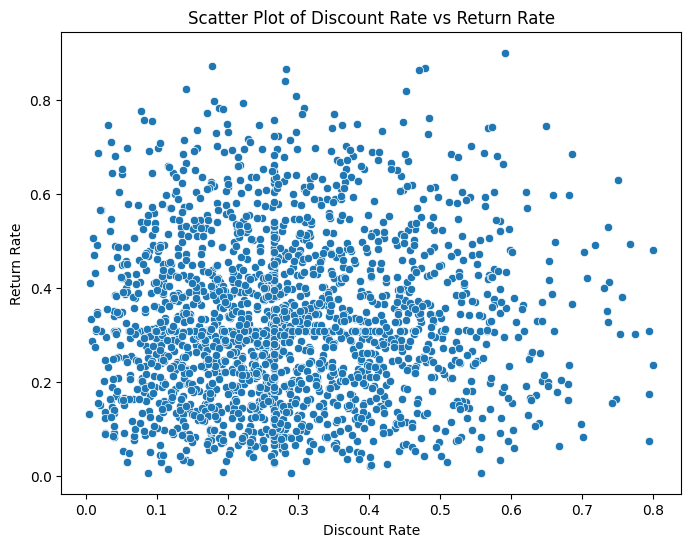

Average Return Rate by Discount Rate Bin:
Discount_Rate_Bin
0-0.2      0.322276
0.2-0.4    0.327570
0.4-0.6    0.340768
0.6-0.8    0.311313
Name: Return_Rate, dtype: float64


In [37]:
# Scatter plot for Discount_Rate vs Return_Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Rate', y='Return_Rate', data=df)
plt.title('Scatter Plot of Discount Rate vs Return Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Return Rate')
plt.show()

# Bin Discount_Rate into categories and compute average Return_Rate
df['Discount_Rate_Bin'] = pd.cut(df['Discount_Rate'], bins=[0, 0.2, 0.4, 0.6, 0.8], labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8'])
print("Average Return Rate by Discount Rate Bin:")
print(df.groupby('Discount_Rate_Bin')['Return_Rate'].mean())

Average Product Price and Product Rating for High-Return Categories:
             Product_Price  Product_Rating
Category_ID                               
3               162.272121        3.726921
5               156.211440        3.754871
10              170.083772        3.742515


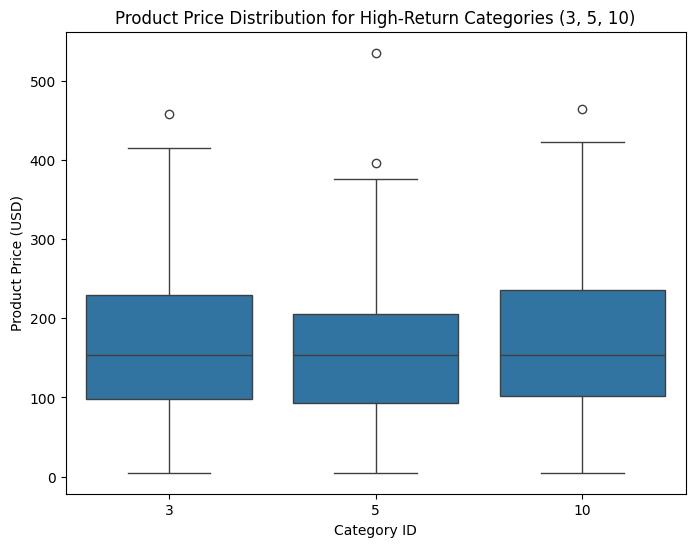

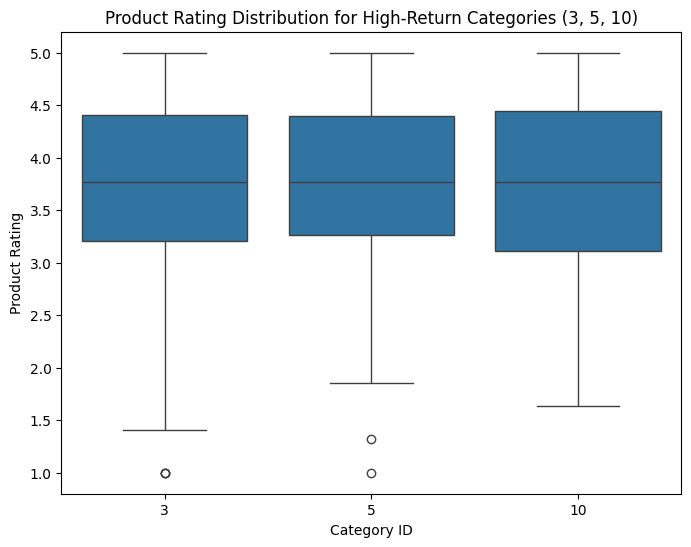

In [38]:
# Filter for high-return categories (3, 5, 10)
high_return_categories = df[df['Category_ID'].isin([3, 5, 10])]

# Compute average Product_Price and Product_Rating for these categories
print("Average Product Price and Product Rating for High-Return Categories:")
print(high_return_categories.groupby('Category_ID')[['Product_Price', 'Product_Rating']].mean())

# Boxplot for Product_Price by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Product_Price', data=high_return_categories)
plt.title('Product Price Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Product Price (USD)')
plt.show()

# Boxplot for Product_Rating by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Product_Rating', data=high_return_categories)
plt.title('Product Rating Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Product Rating')
plt.show()

Average Number of Reviews for High-Return Categories:
Category_ID
3     351.870056
5     268.675532
10    327.578035
Name: Number_of_Reviews, dtype: float64


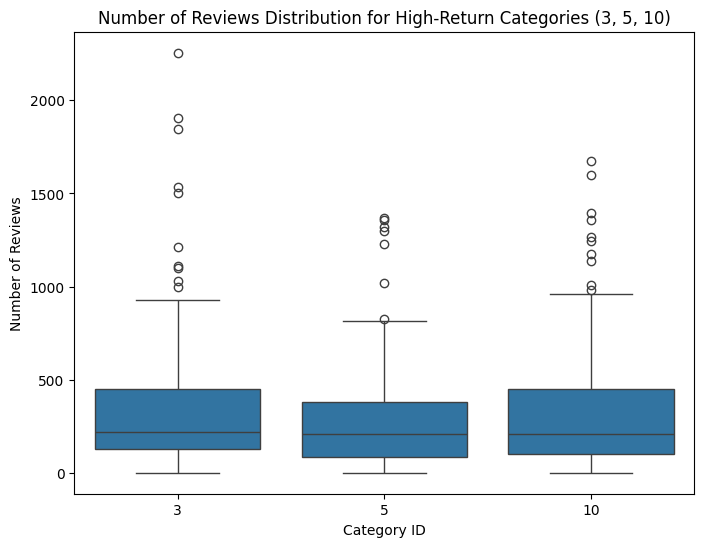

In [39]:
# Filter for high-return categories (3, 5, 10)
high_return_categories = df[df['Category_ID'].isin([3, 5, 10])]

# Compute average Number_of_Reviews for these categories
print("Average Number of Reviews for High-Return Categories:")
print(high_return_categories.groupby('Category_ID')['Number_of_Reviews'].mean())

# Boxplot for Number_of_Reviews by Category_ID (for categories 3, 5, 10)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category_ID', y='Number_of_Reviews', data=high_return_categories)
plt.title('Number of Reviews Distribution for High-Return Categories (3, 5, 10)')
plt.xlabel('Category ID')
plt.ylabel('Number of Reviews')
plt.show()

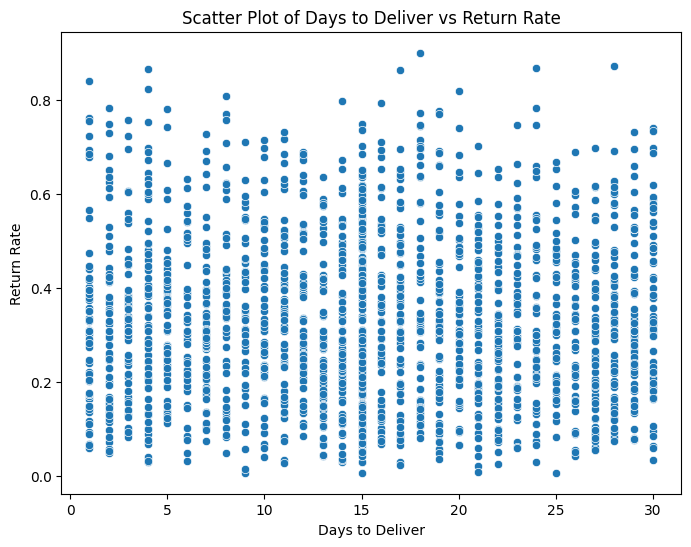

Average Return Rate by Days to Deliver Bin:
Days_to_Deliver_Bin
0-10     0.334575
10-20    0.328324
20-30    0.320349
Name: Return_Rate, dtype: float64


In [40]:
# Scatter plot for Days_to_Deliver vs Return_Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Days_to_Deliver', y='Return_Rate', data=df)
plt.title('Scatter Plot of Days to Deliver vs Return Rate')
plt.xlabel('Days to Deliver')
plt.ylabel('Return Rate')
plt.show()

# Bin Days_to_Deliver into categories and compute average Return_Rate
df['Days_to_Deliver_Bin'] = pd.cut(df['Days_to_Deliver'], bins=[0, 10, 20, 30], labels=['0-10', '10-20', '20-30'])
print("Average Return Rate by Days to Deliver Bin:")
print(df.groupby('Days_to_Deliver_Bin')['Return_Rate'].mean())

## Summary and Insights

### Key Findings from EDA and Analysis
- **Distributions**:
  - `Product_Price` is right-skewed, with most products priced below 200 USD (mean: 156.62 USD).
  - `Product_Rating` is left-skewed, with most ratings around 4.0–4.5 (mean: 3.73), indicating good customer satisfaction.
  - `Number_of_Reviews` is heavily right-skewed, with most products having fewer than 500 reviews (mean: 299.60).
  - `Return_Rate` is right-skewed, with most values below 0.5 (mean: 0.3278).
- **Relationships**:
  - No strong linear correlations between numerical columns (highest: 0.0426 between `Discount_Rate` and `Number_of_Reviews`).
  - Products with 40–60% discounts have the highest return rate (0.3408), while very high discounts (60–80%) have a lower return rate (0.3113).
  - Shorter delivery times (0–10 days) have a slightly higher return rate (0.3346) compared to longer times (20–30 days, 0.3203), possibly due to impulse purchases.
- **Category Insights**:
  - Categories 3, 5, and 10 have the highest return rates (0.3411, 0.3353, 0.3357).
  - Category 10 has the highest average price (170.08 USD), suggesting higher prices might lead to higher expectations and returns.
  - Category 3 has the highest average number of reviews (351.87), indicating higher purchase volume might contribute to more returns.
- **Stock Impact**:
  - In-stock and out-of-stock products have nearly identical ratings (3.7319 vs 3.7331), suggesting stock status doesn’t impact customer satisfaction.

### Answers to Key Questions
- **Which products generate the most profit?**
  - Without profit data, we used `Product_Price` and `Return_Rate` as proxies. Category 10 (average price: 170.08 USD) might generate high revenue but has a high return rate (0.3357), potentially reducing profit. Category 2 (lowest return rate: 0.3091) could be more profitable.
- **Is there a correlation between views, cart adds, and purchases?**
  - Using `Number_of_Reviews` as a proxy for engagement, correlations are weak (e.g., 0.0426 with `Discount_Rate`). No strong evidence of a relationship between engagement and returns or ratings.
- **Which products have the highest conversion rates?**
  - Without direct conversion data, we used `Number_of_Reviews` as a proxy for purchases. Category 3 has the highest reviews (351.87), suggesting higher purchase volume, but its high return rate (0.3411) indicates potential post-purchase dissatisfaction.
- **What categories perform best in terms of revenue and profit?**
  - Categories 3 and 10 likely have higher revenue (higher prices and reviews: 162.27 USD/351.87 reviews for Category 3, 170.08 USD/327.58 reviews for Category 10). However, their high return rates might reduce profit. Category 2 (lowest return rate) could be more profitable.

### Business Insights
- **Reduce Returns**: Investigate Categories 3, 5, and 10 for quality or expectation mismatches. Category 10’s higher prices might lead to stricter customer expectations.
- **Discount Strategy**: Avoid 40–60% discounts unless clearing inventory, as they lead to higher returns (0.3408). Very high discounts (60–80%) have lower returns (0.3113).
- **Delivery Planning**: Shorter delivery times (0–10 days) have higher return rates (0.3346). Manage expectations for fast deliveries to reduce impulse returns.
- **Stock Management**: Stock status doesn’t affect ratings, so prioritize stocking high-demand categories like Category 3 (high reviews).

### Dashboards in Power BI/Tableau
- **Product Performance Dashboard**: Includes a bar chart of `Product_Price` and `Return_Rate` by `Category_ID`, and a scatter plot of `Number_of_Reviews` vs `Return_Rate`.
- **Category Insights Dashboard**: Features a pie chart of product distribution by `Category_ID`, a line chart of `Return_Rate` by `Days_to_Deliver` bins, and a table of top categories by estimated revenue (price * reviews).

### Next Steps
- Conduct surveys for Categories 3, 5, and 10 to better understand reasons for high return rates (e.g., quality issues or mismatched expectations).
- Collect cost data to enable more accurate profit analysis for identifying high-profit products and categories.
- Explore building a predictive model (e.g., linear regression) to forecast `Return_Rate` using features like `Product_Price` and `Category_ID`, which could help in proactively reducing returns.